In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from fastai.tabular import *

In [3]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [30]:
from google.colab import files
files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG.csv
Saving train_ctrUa4K.csv to train_ctrUa4K.csv


{'test_lAUu6dG.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\r\nLP001094,Male,Yes,2,Graduat

In [154]:
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')


In [130]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [131]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [132]:
(test.isnull().sum()/test.shape[0])*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [133]:
MA_cols=['Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [134]:
test[MA_cols].head()

,Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,0,No,110.0,360.0,1.0
1,Male,1,No,126.0,360.0,1.0
2,Male,2,No,208.0,360.0,1.0
3,Male,2,No,100.0,360.0,NaN
4,Male,0,No,78.0,360.0,1.0


In [135]:
test[MA_cols].nunique()

Gender                2
Dependents            4
Self_Employed         2
LoanAmount          144
Loan_Amount_Term     12
Credit_History        2
dtype: int64

In [136]:
Med=test['LoanAmount'].median()
test['LoanAmount']=test['LoanAmount'].fillna(Med)

In [137]:
mod1=test['Dependents'].mode()[0]
test['Dependents']=test['Dependents'].fillna(mod1)
mod2=test['Self_Employed'].mode()[0]
test['Self_Employed']=test['Self_Employed'].fillna(mod2)
mod3=test['Loan_Amount_Term'].mode()[0]
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(mod3)
mod4=test['Credit_History'].mode()[0]
test['Credit_History']=test['Credit_History'].fillna(mod4)
mod5=test['Gender'].mode()[0]
test['Gender']=test['Gender'].fillna(mod5)

In [138]:
test_id=test['Loan_ID']

In [139]:
train=train.drop(labels='Loan_ID', axis=1)
test=test.drop(labels='Loan_ID', axis=1)

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [141]:
path = ''

dep_var = ['Loan_Status']

cat_names=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

cont_names=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

procs = [FillMissing, Categorify, Normalize]

start_indx = len(train) - int(len(train) * 0.2)
end_indx = len(train)

val = (TabularList.from_df(train.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_names, cont_names=cont_names))
test = (TabularList.from_df(test, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))

data = (TabularList.from_df(train, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs).split_by_rand_pct(valid_pct = 0.1, seed = 42).label_from_df(cols = dep_var).add_test(test,label=0).databunch())


In [142]:
data.show_batch(rows = 10)

Gender,Married,Dependents,Education,Self_Employed,Property_Area,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target
Male,Yes,2,Not Graduate,No,Rural,False,False,False,-0.2049,-0.0736,-0.2044,0.2824,0.4139,N
Male,No,0,Graduate,No,Semiurban,False,False,False,-0.2919,1.1191,0.4796,0.2824,0.4139,Y
Male,Yes,1,Not Graduate,No,Semiurban,False,False,False,-0.4530,1.7877,1.5645,-2.4576,0.4139,Y
Male,Yes,2,Graduate,No,Semiurban,False,False,False,0.1256,0.0134,0.7508,0.2824,0.4139,Y
Male,Yes,1,Graduate,No,Semiurban,False,False,False,-0.4174,0.0620,-0.2752,2.1091,0.4139,Y
Female,Yes,0,Graduate,No,Semiurban,False,False,False,-0.2081,0.2139,0.4206,0.2824,0.4139,Y
Male,Yes,0,Graduate,No,Semiurban,False,False,False,-0.5462,0.4909,-0.2162,0.2824,0.4139,Y
Female,Yes,0,Not Graduate,No,Semiurban,False,False,False,-0.5712,-0.0033,-0.5464,0.2824,0.4139,Y
Male,Yes,2,Graduate,No,Urban,False,False,False,-0.6726,-0.1865,-1.5252,-3.3709,0.4139,Y
Male,Yes,0,Graduate,No,Semiurban,False,False,False,-0.4789,0.1522,-0.4992,0.2824,0.4139,Y


In [143]:
learn = tabular_learner(data, layers=[1000, 200, 15], metrics=accuracy, emb_drop=0.3, callback_fns=ShowGraph)

In [144]:
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (553 items)
x: TabularList
Gender Male; Married No; Dependents 0; Education Graduate; Self_Employed No; Property_Area Urban; LoanAmount_na True; Loan_Amount_Term_na False; Credit_History_na False; ApplicantIncome 0.0609; CoapplicantIncome -0.5429; LoanAmount -0.2162; Loan_Amount_Term 0.2824; Credit_History 0.4139; ,Gender Male; Married Yes; Dependents 1; Education Graduate; Self_Employed No; Property_Area Rural; LoanAmount_na False; Loan_Amount_Term_na False; Credit_History_na False; ApplicantIncome -0.1432; CoapplicantIncome -0.0480; LoanAmount -0.2162; Loan_Amount_Term 0.2824; Credit_History 0.4139; ,Gender Male; Married Yes; Dependents 0; Education Not Graduate; Self_Employed No; Property_Area Urban; LoanAmount_na False; Loan_Amount_Term_na False; Credit_History_na False; ApplicantIncome -0.4656; CoapplicantIncome 0.2310; LoanAmount -0.3105; Loan_Amount_Term 0.2824; Credit_History 0.4139; ,Gender Male; M

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


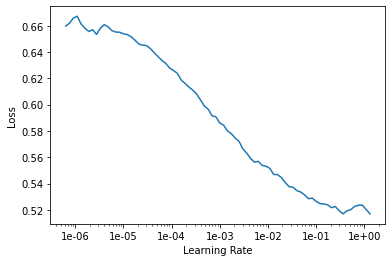

In [145]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.986969,58.939964,0.606557,00:00
1,2.460241,3533.438232,0.639344,00:00
2,6.366454,209.296249,0.327869,00:00
3,45.487659,129898.710938,0.327869,00:00
4,92.634819,2485.479980,0.770492,00:00
5,129.304962,303.199310,0.655738,00:00
6,109.438522,14.187919,0.786885,00:00
7,91.863823,23.470221,0.327869,00:00
8,74.826088,0.711164,0.672131,00:00
9,61.207893,0.694410,0.672131,00:00


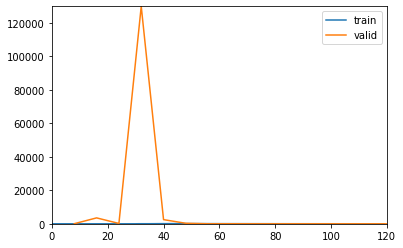

In [146]:
learn.fit_one_cycle(15, max_lr=slice(1e+01))

In [147]:
learn.show_results(ds_type=DatasetType.Train,rows = 50)

Gender,Married,Dependents,Education,Self_Employed,Property_Area,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,prediction
Male,Yes,2,Graduate,No,Urban,False,False,False,0.3405,-0.5429,0.4796,0.2824,0.4139,Y,Y
Male,No,0,Graduate,Yes,Urban,False,False,False,0.0933,0.8792,-0.3105,-2.4576,0.4139,N,Y
Female,No,0,Graduate,No,Semiurban,False,False,False,-0.5375,2.4044,-0.1101,0.2824,-2.4118,Y,Y
Male,Yes,2,Graduate,No,Urban,False,False,False,-0.3727,-0.3916,-0.4520,-3.9189,0.4139,Y,Y
Male,Yes,2,Graduate,No,Rural,False,False,False,0.4614,0.4965,0.2201,0.2824,0.4139,Y,Y
Male,No,0,Not Graduate,No,Semiurban,False,False,False,-0.2984,-0.5429,-1.4309,-3.3709,0.4139,Y,Y
Male,Yes,0,Graduate,No,Rural,False,False,False,-0.7167,0.3672,-0.4049,0.2824,0.4139,Y,Y
Male,Yes,0,Not Graduate,No,Rural,False,False,False,-0.4117,-0.3670,-0.9473,0.2824,0.4139,N,Y
Male,No,0,Graduate,No,Semiurban,False,False,False,-0.4030,0.3731,-0.0275,0.2824,0.4139,Y,Y
Male,Yes,1,Graduate,No,Semiurban,False,False,False,-0.3782,0.3049,0.2791,0.2824,0.4139,N,Y


In [148]:
learn.show_results(ds_type=DatasetType.Valid,rows = 50)

Gender,Married,Dependents,Education,Self_Employed,Property_Area,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,prediction
Male,Yes,0,Graduate,No,Semiurban,False,False,False,0.5823,-0.5429,0.9631,0.2824,0.4139,Y,Y
Male,Yes,0,Graduate,No,Semiurban,False,False,True,-0.1872,-0.5429,-0.1926,0.2824,0.4139,Y,Y
Male,Yes,2,Graduate,No,Rural,False,False,False,-0.2102,-0.0680,0.1376,0.2824,0.4139,Y,Y
Female,No,0,Graduate,No,Rural,False,False,False,-0.4145,-0.5429,-0.8884,0.2824,0.4139,Y,Y
Male,No,0,Graduate,No,Semiurban,False,False,False,-0.4438,-0.5429,-0.9002,0.2824,0.4139,Y,Y
Male,Yes,1,Graduate,No,Rural,False,False,False,-0.5947,0.1897,-0.4638,0.2824,0.4139,Y,Y
Male,Yes,2,Graduate,No,Semiurban,False,False,False,-0.2828,-0.5429,-0.3105,0.2824,0.4139,Y,Y
Male,Yes,0,Graduate,Yes,Urban,False,False,False,-0.3983,-0.5429,-0.9473,0.2824,0.4139,Y,Y
Male,Yes,3+,Not Graduate,No,Rural,False,False,False,-0.4552,-0.0220,0.3145,0.2824,0.4139,N,Y
Male,Yes,1,Graduate,Yes,Urban,False,False,False,-0.7208,0.4489,-0.4285,0.2824,0.4139,N,Y


In [149]:
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics :", str(learn.metrics))
print("\n The Training Set accuracy :", tr[1:])
print("\nT The Validation Set accuracy :", va[1:])

The Metrics : [<function accuracy at 0x7f5a4d915b70>]

 The Training Set accuracy : [tensor(0.6914)]

T The Validation Set accuracy : [tensor(0.6721)]


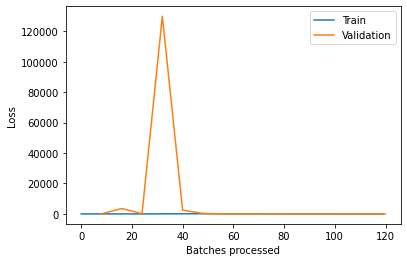

In [150]:
learn.recorder.plot_losses()

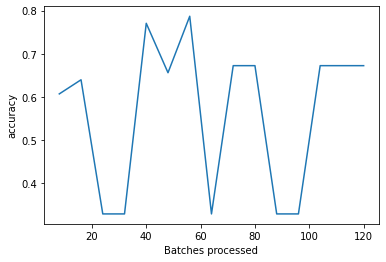

In [151]:
learn.recorder.plot_metrics()

In [153]:
predictions,*_  = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)
submission = pd.DataFrame({'Loan_ID': test_id, 'Loan_Status': labels})
submission.to_csv('submission.csv', index=False)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [111]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


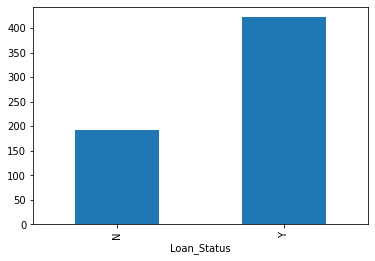

In [156]:
train.groupby('Loan_Status').size().plot(kind='bar')